In [2]:
import io
import argparse

import numpy as np 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
from gensim.models import Word2Vec,KeyedVectors
def load_vectors(model, required_tokens):
    data = {}
    for required_token in required_tokens:
        am, english = required_token.split(' ')
        data[required_token] = model.wv[am]
    return data

In [4]:
def tsne_plot(data, relation2tokens, output_plot_save_path, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], n_components=2, random_state=42):
  tokens = list(data.keys())
  hindi_tokens = list()
  english_tokens = list()
  for token in tokens:
    hindi, english = token.split()
    hindi_tokens.append(hindi)
    english_tokens.append(english)
  embeddings = list(data.values())
  relations = list(relation2tokens.keys())

  token2relation = dict()
  for relation in relation2tokens:
    for token in relation2tokens[relation]:
      token2relation[token] = relation

  relation_color_map = dict()
  assert(len(colors) >= len(relations))
  for i in range(len(relations)):
    relation_color_map[relations[i]] = colors[i]

  tsne_model = TSNE(perplexity=4, n_iter=10000, n_components=2, random_state=random_state+3, n_jobs=-1)
  values = tsne_model.fit_transform(embeddings)

  x, y = list(), list()
  for value in values:
    x.append(value[0])
    y.append(value[1])
  
  prop = fm.FontProperties(fname='Chiret-Regular.ttf')
  #prop = fm.FontProperties(fname='Tera-Regular.ttf')
    
  dpi=300
  plt.figure(figsize=(8, 6), edgecolor='black', linewidth=2, dpi=dpi)
  for i in range(len(x)):
    plt.scatter(x[i], y[i], c=relation_color_map[token2relation[tokens[i]]], label=token2relation[tokens[i]])
    if(hindi_tokens[i] == 'መሳሪያ'):
      plt.annotate('መሳሪያ', xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', fontproperties=prop, fontsize='x-large', ha='right', va='bottom')
    else:
      plt.annotate(hindi_tokens[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', fontproperties=prop, fontsize='x-large', ha='right', va='bottom')
    plt.annotate(english_tokens[i], xy=(x[i]+15, y[i]-18), xytext=(5, 2), textcoords='offset points', fontsize='medium', fontstyle='italic', ha='right', va='bottom')
  handles, labels = plt.gca().get_legend_handles_labels()
  by_label = dict(zip(labels, handles))
  handles = list(by_label.values())
  labels = list(by_label.keys())
  # ensure that the reordering of this list is consistent
  handles = [handles[1], handles[0], handles[2], handles[3],handles[4]]
  labels = [labels[1], labels[0], labels[2], labels[3], labels[4]]
  plt.legend(handles, labels, fontsize='medium', loc='upper right')
#   plt.axis('off')
  plt.savefig(output_plot_save_path, dpi=dpi)

In [5]:
def main(DT_embedding_path, output_plot_save_path, relation2tokens):
  required_tokens = list()
  for relation in relation2tokens:
    required_tokens.extend(relation2tokens[relation])

  data = load_vectors(DT_embedding_path, required_tokens)
  tsne_plot(data, relation2tokens, output_plot_save_path)

/home/yimam/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yimam/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


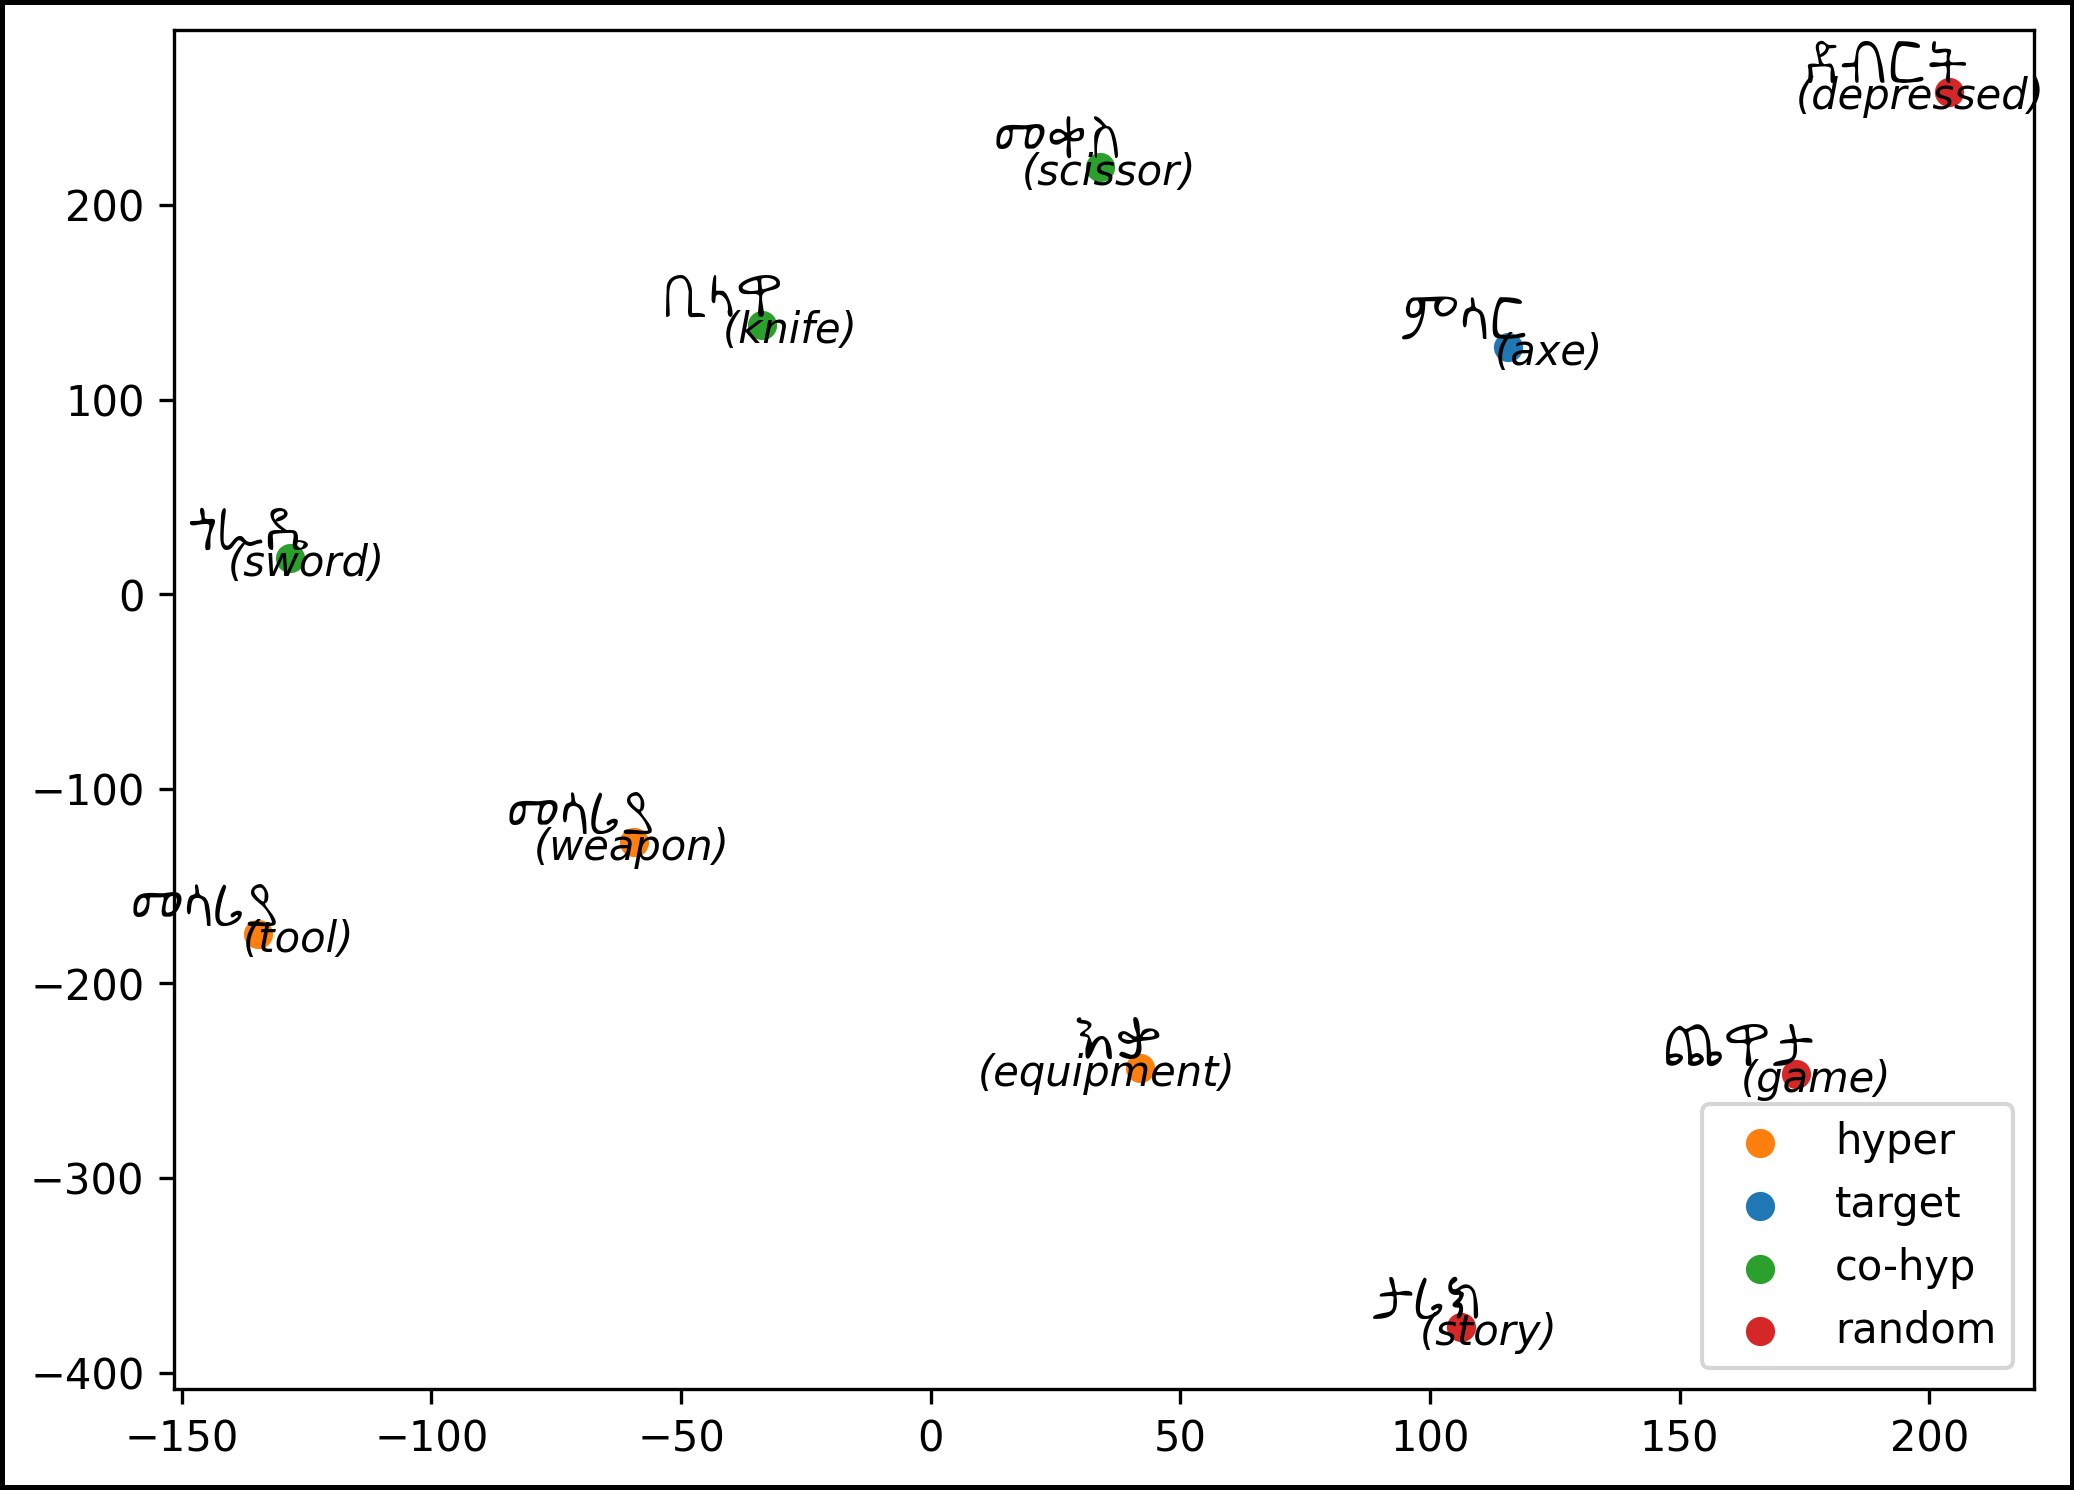

In [32]:
relation2tokens = dict()
relation2tokens['target'] = ['ምሳር (axe)']
relation2tokens['hyper'] = ['እቃ (equipment)', 'መሳሪያ (tool)', 'መሳሪያ (weapon)']
relation2tokens['co-hyp'] = ['ቢላዋ (knife)', 'መቀስ (scissor)', 'ጎራዴ (sword)']
relation2tokens['random'] = ['ድብርት (depressed)', 'ጨዋታ (game)', 'ታሪክ (story)']
assert(len(relation2tokens['target']) == 1)

main(DT_embedding_path='Model/am_fasttext_cbow_200D', 
   output_plot_save_path='out', 
   relation2tokens=relation2tokens)

In [39]:
 w2vc= KeyedVectors.load('Model/5w_10ng_am_w2v_cbow_200D')

In [10]:
 w2vs= KeyedVectors.load('Model/5w_10ng_am_w2v_sg_200D')

/home/yimam/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yimam/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


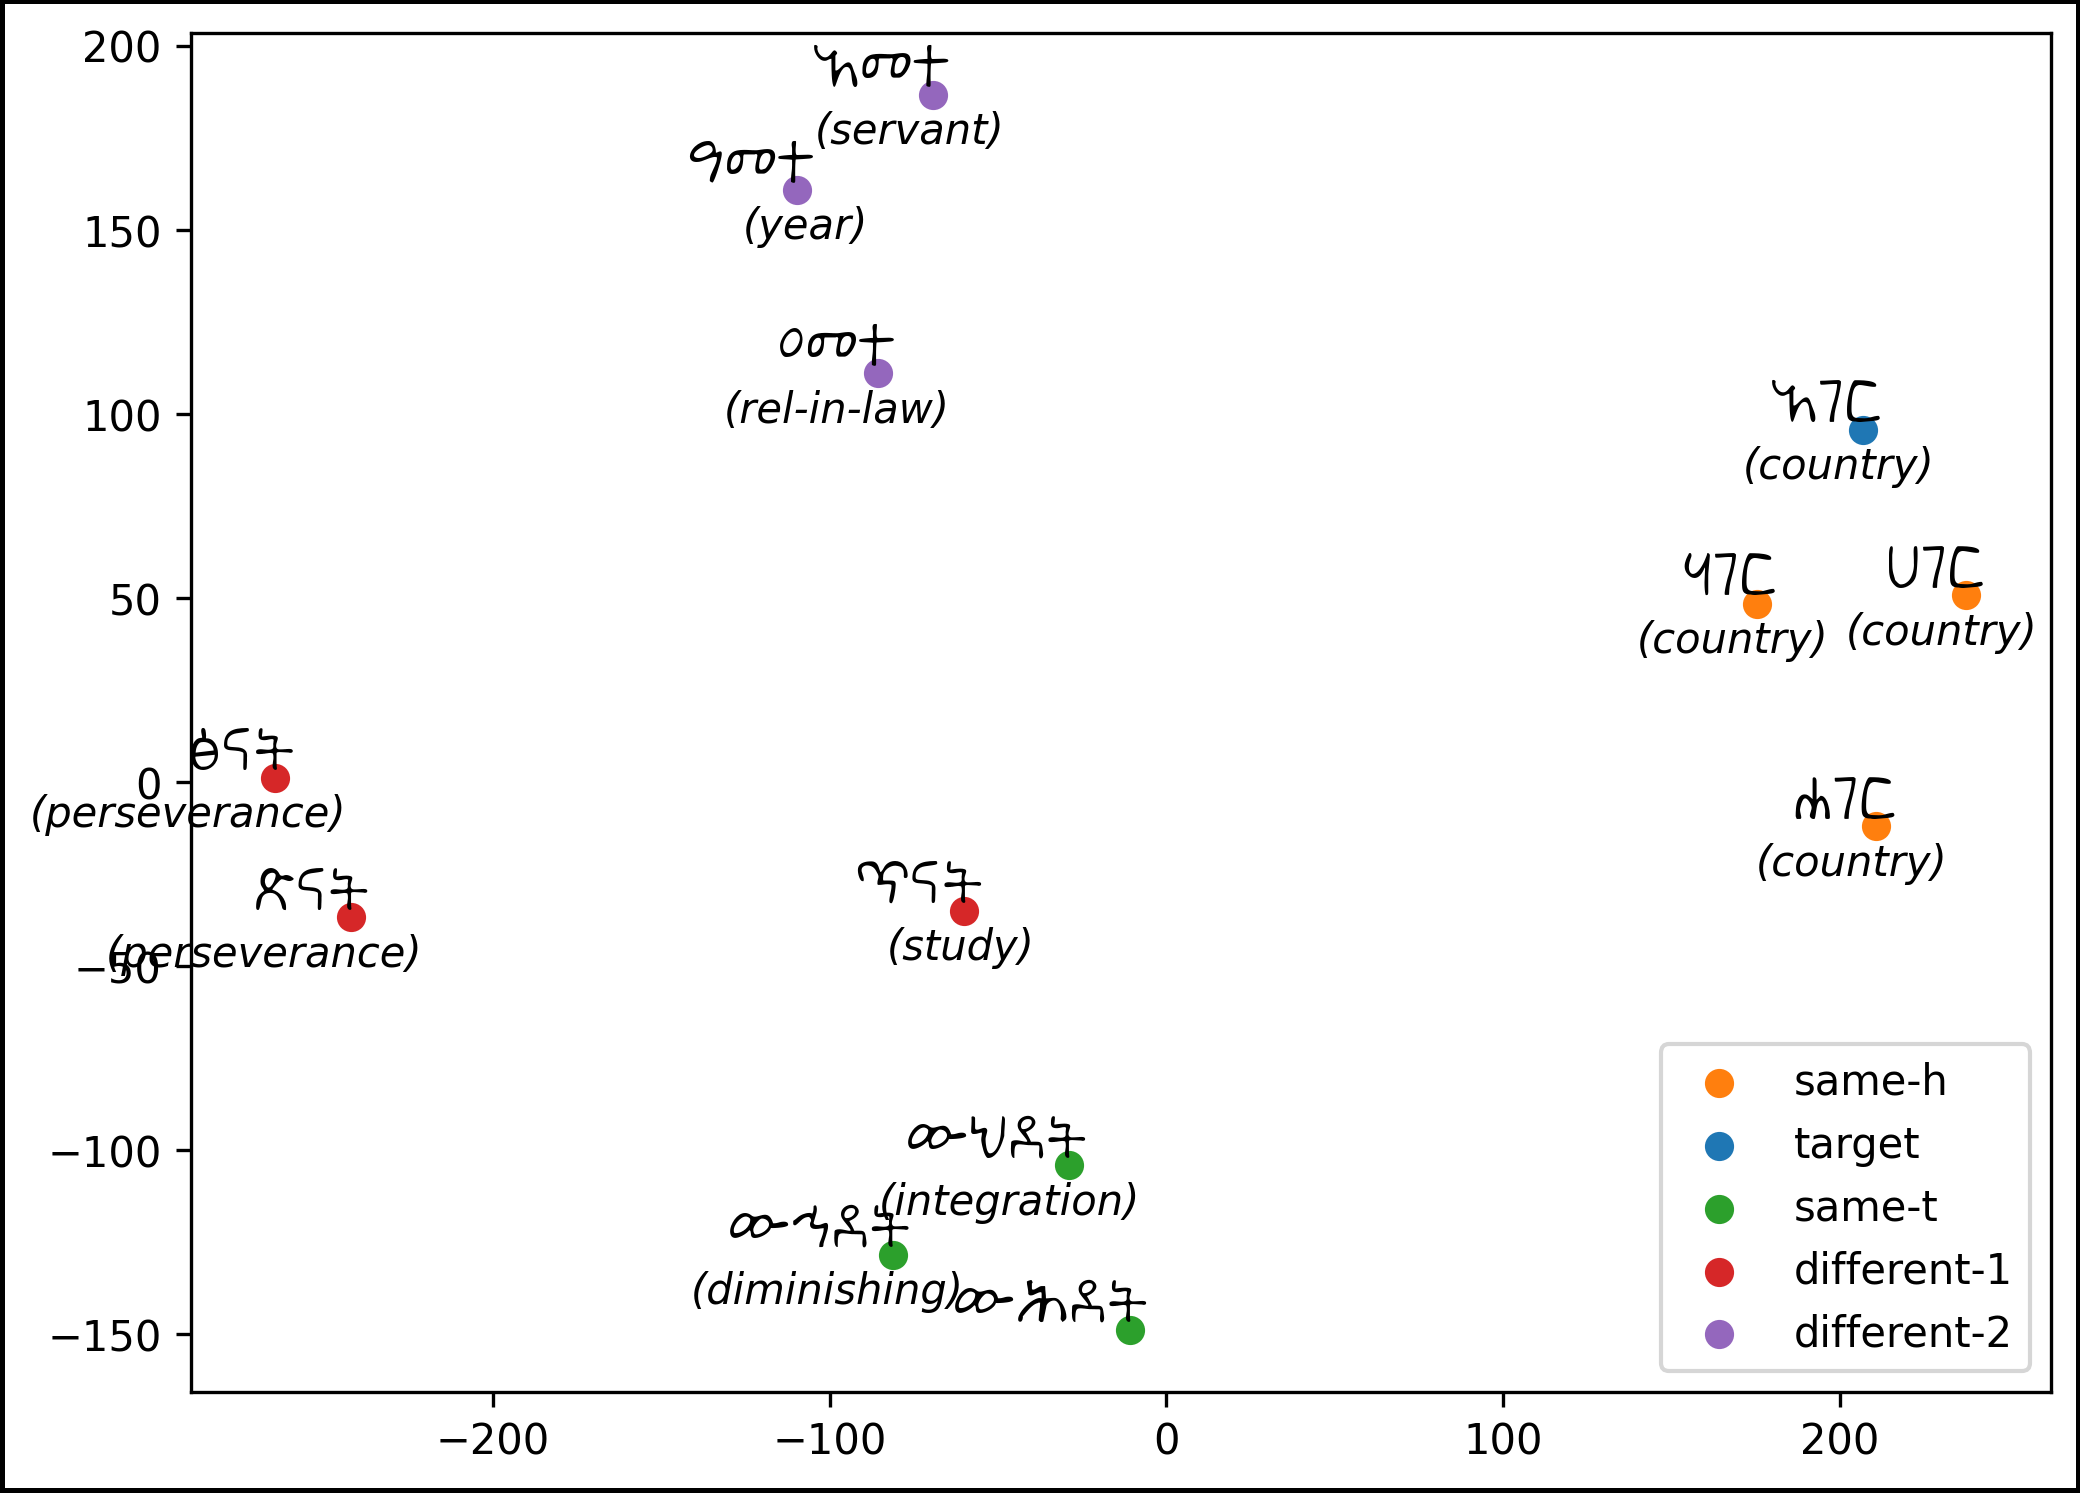

In [38]:
relation2tokens = dict()
relation2tokens['target'] = ['አገር (country)']
relation2tokens['same-h'] = ['ሀገር (country)', 'ሃገር (country)', 'ሐገር (country)']
relation2tokens['same-t'] = ['ውሕደት (integration)', 'ውኅደት (diminishing)', 'ውህደት (integration)']
relation2tokens['different-1'] = ['ፅናት (perseverance)', 'ጽናት (perseverance)', 'ጥናት (study)']
relation2tokens['different-2'] = ['አመተ (servant)', 'ዐመተ (rel-in-law)', 'ዓመተ (year)']
assert(len(relation2tokens['target']) == 1)

main(DT_embedding_path=w2vc, 
   output_plot_save_path='out', 
   relation2tokens=relation2tokens)

/home/yimam/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yimam/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


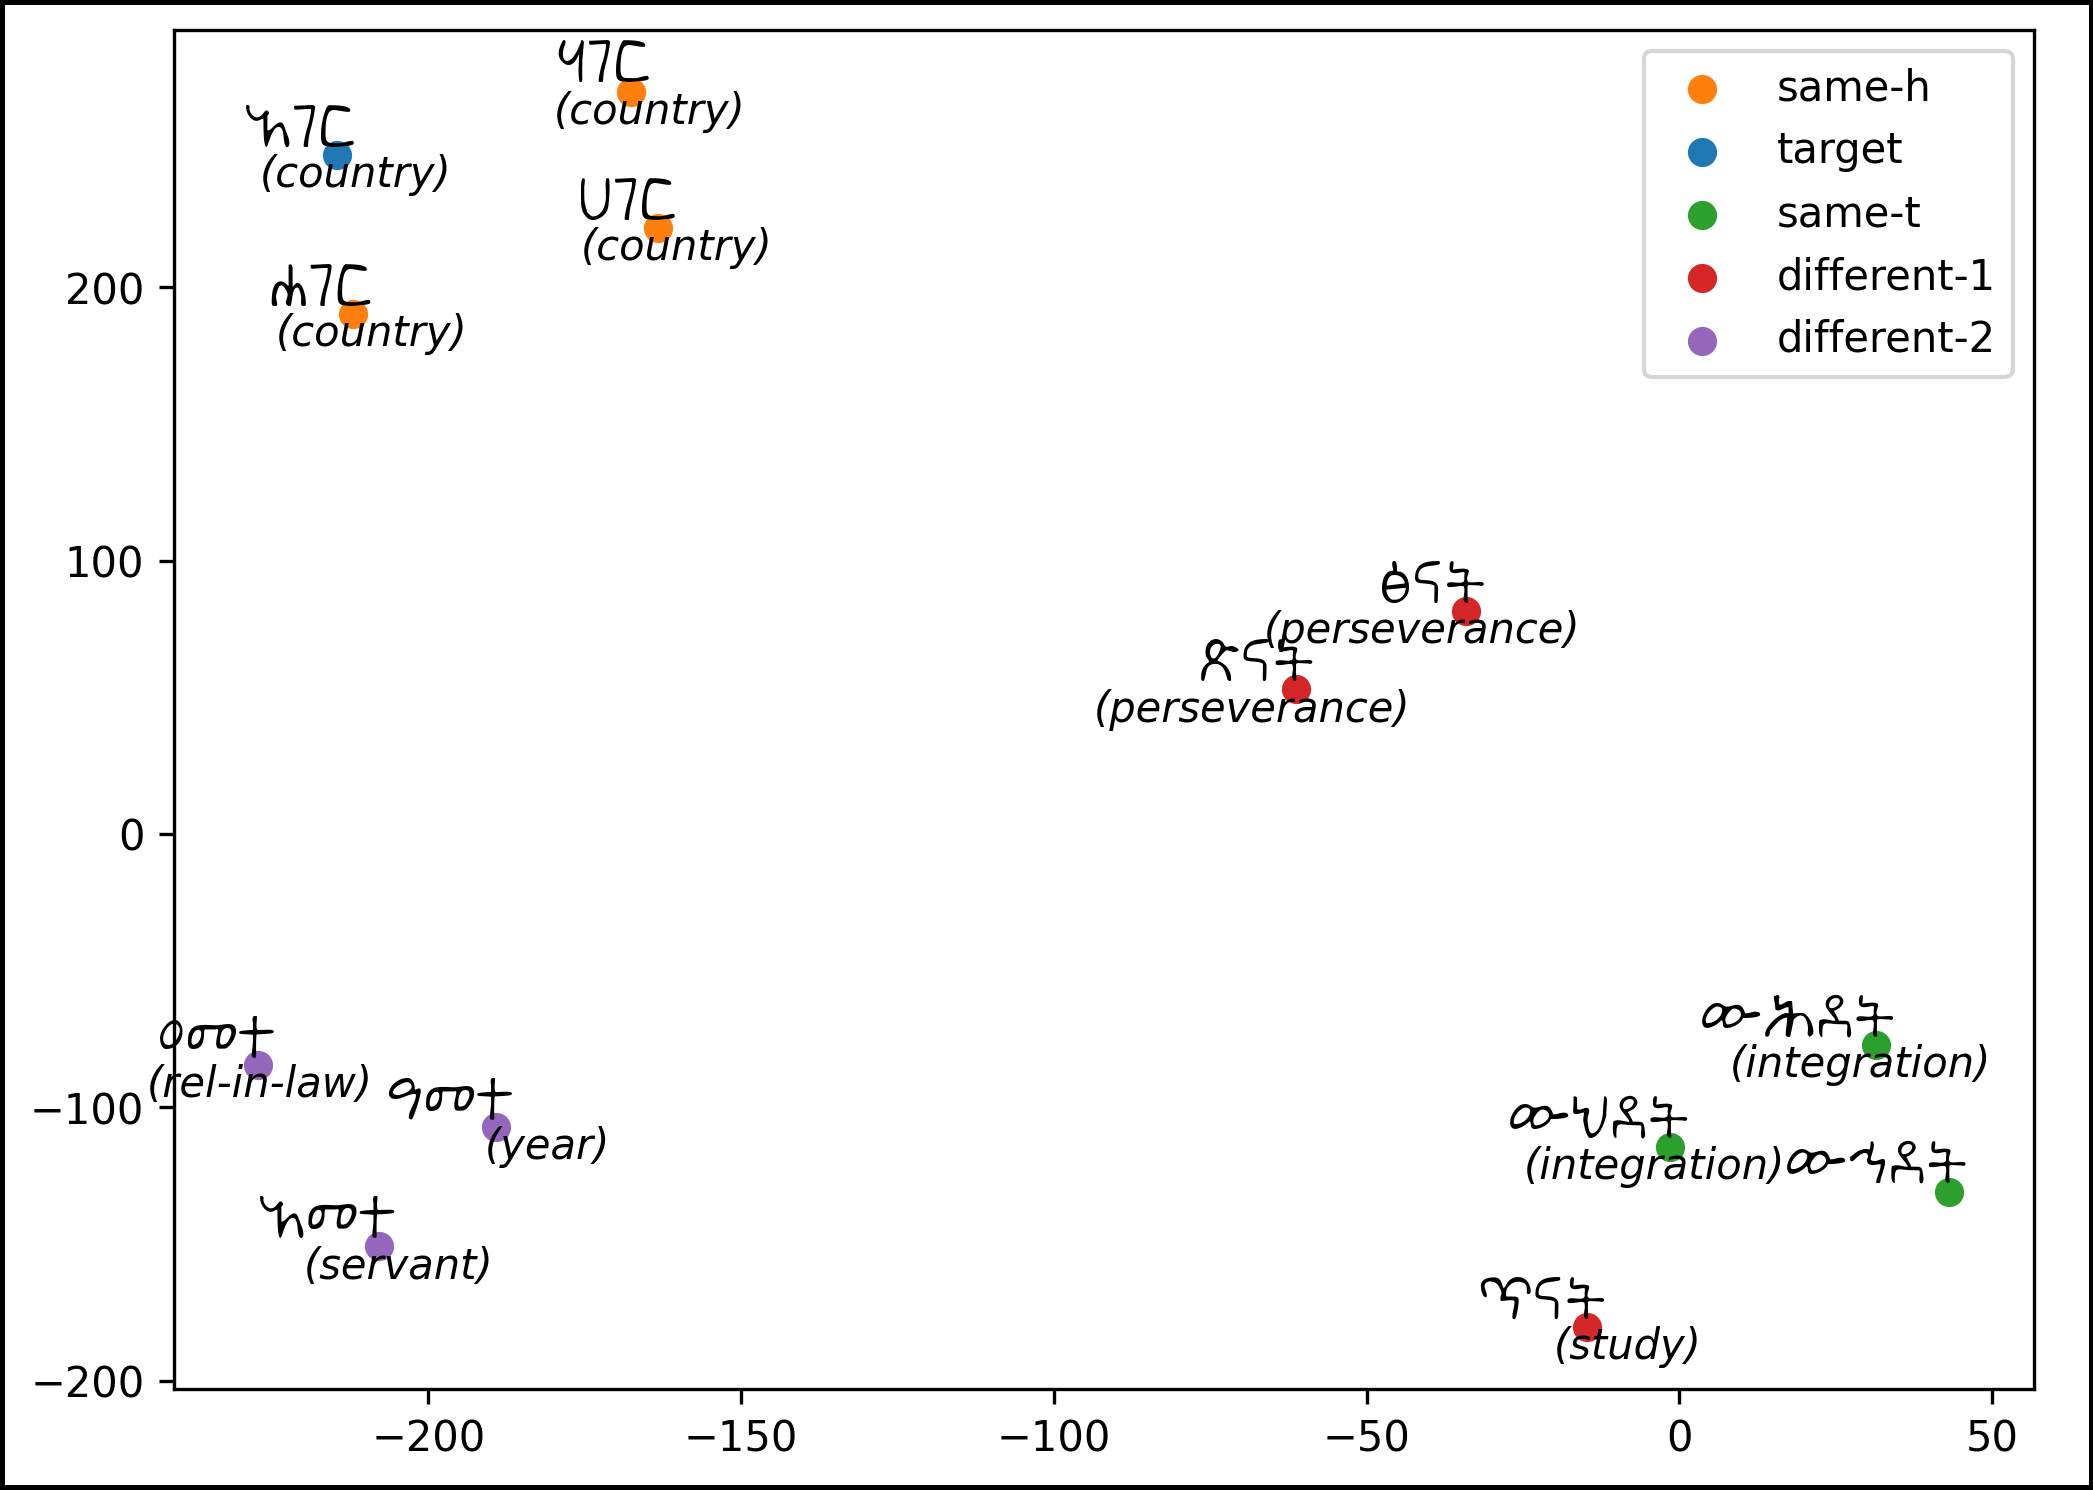

In [46]:
relation2tokens = dict()
relation2tokens['target'] = ['አገር (country)']
relation2tokens['same-h'] = ['ሀገር (country)', 'ሃገር (country)', 'ሐገር (country)']
relation2tokens['same-t'] = ['ውሕደት (integration)', 'ውኅደት (diminishing)', 'ውህደት (integration)']
relation2tokens['different-1'] = ['ፅናት (perseverance)', 'ጽናት (perseverance)', 'ጥናት (study)']
relation2tokens['different-2'] = ['አመተ (servant)', 'ዐመተ (rel-in-law)', 'ዓመተ (year)']
assert(len(relation2tokens['target']) == 1)

main(DT_embedding_path=w2vc, 
   output_plot_save_path='out', 
   relation2tokens=relation2tokens)

/home/yimam/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yimam/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


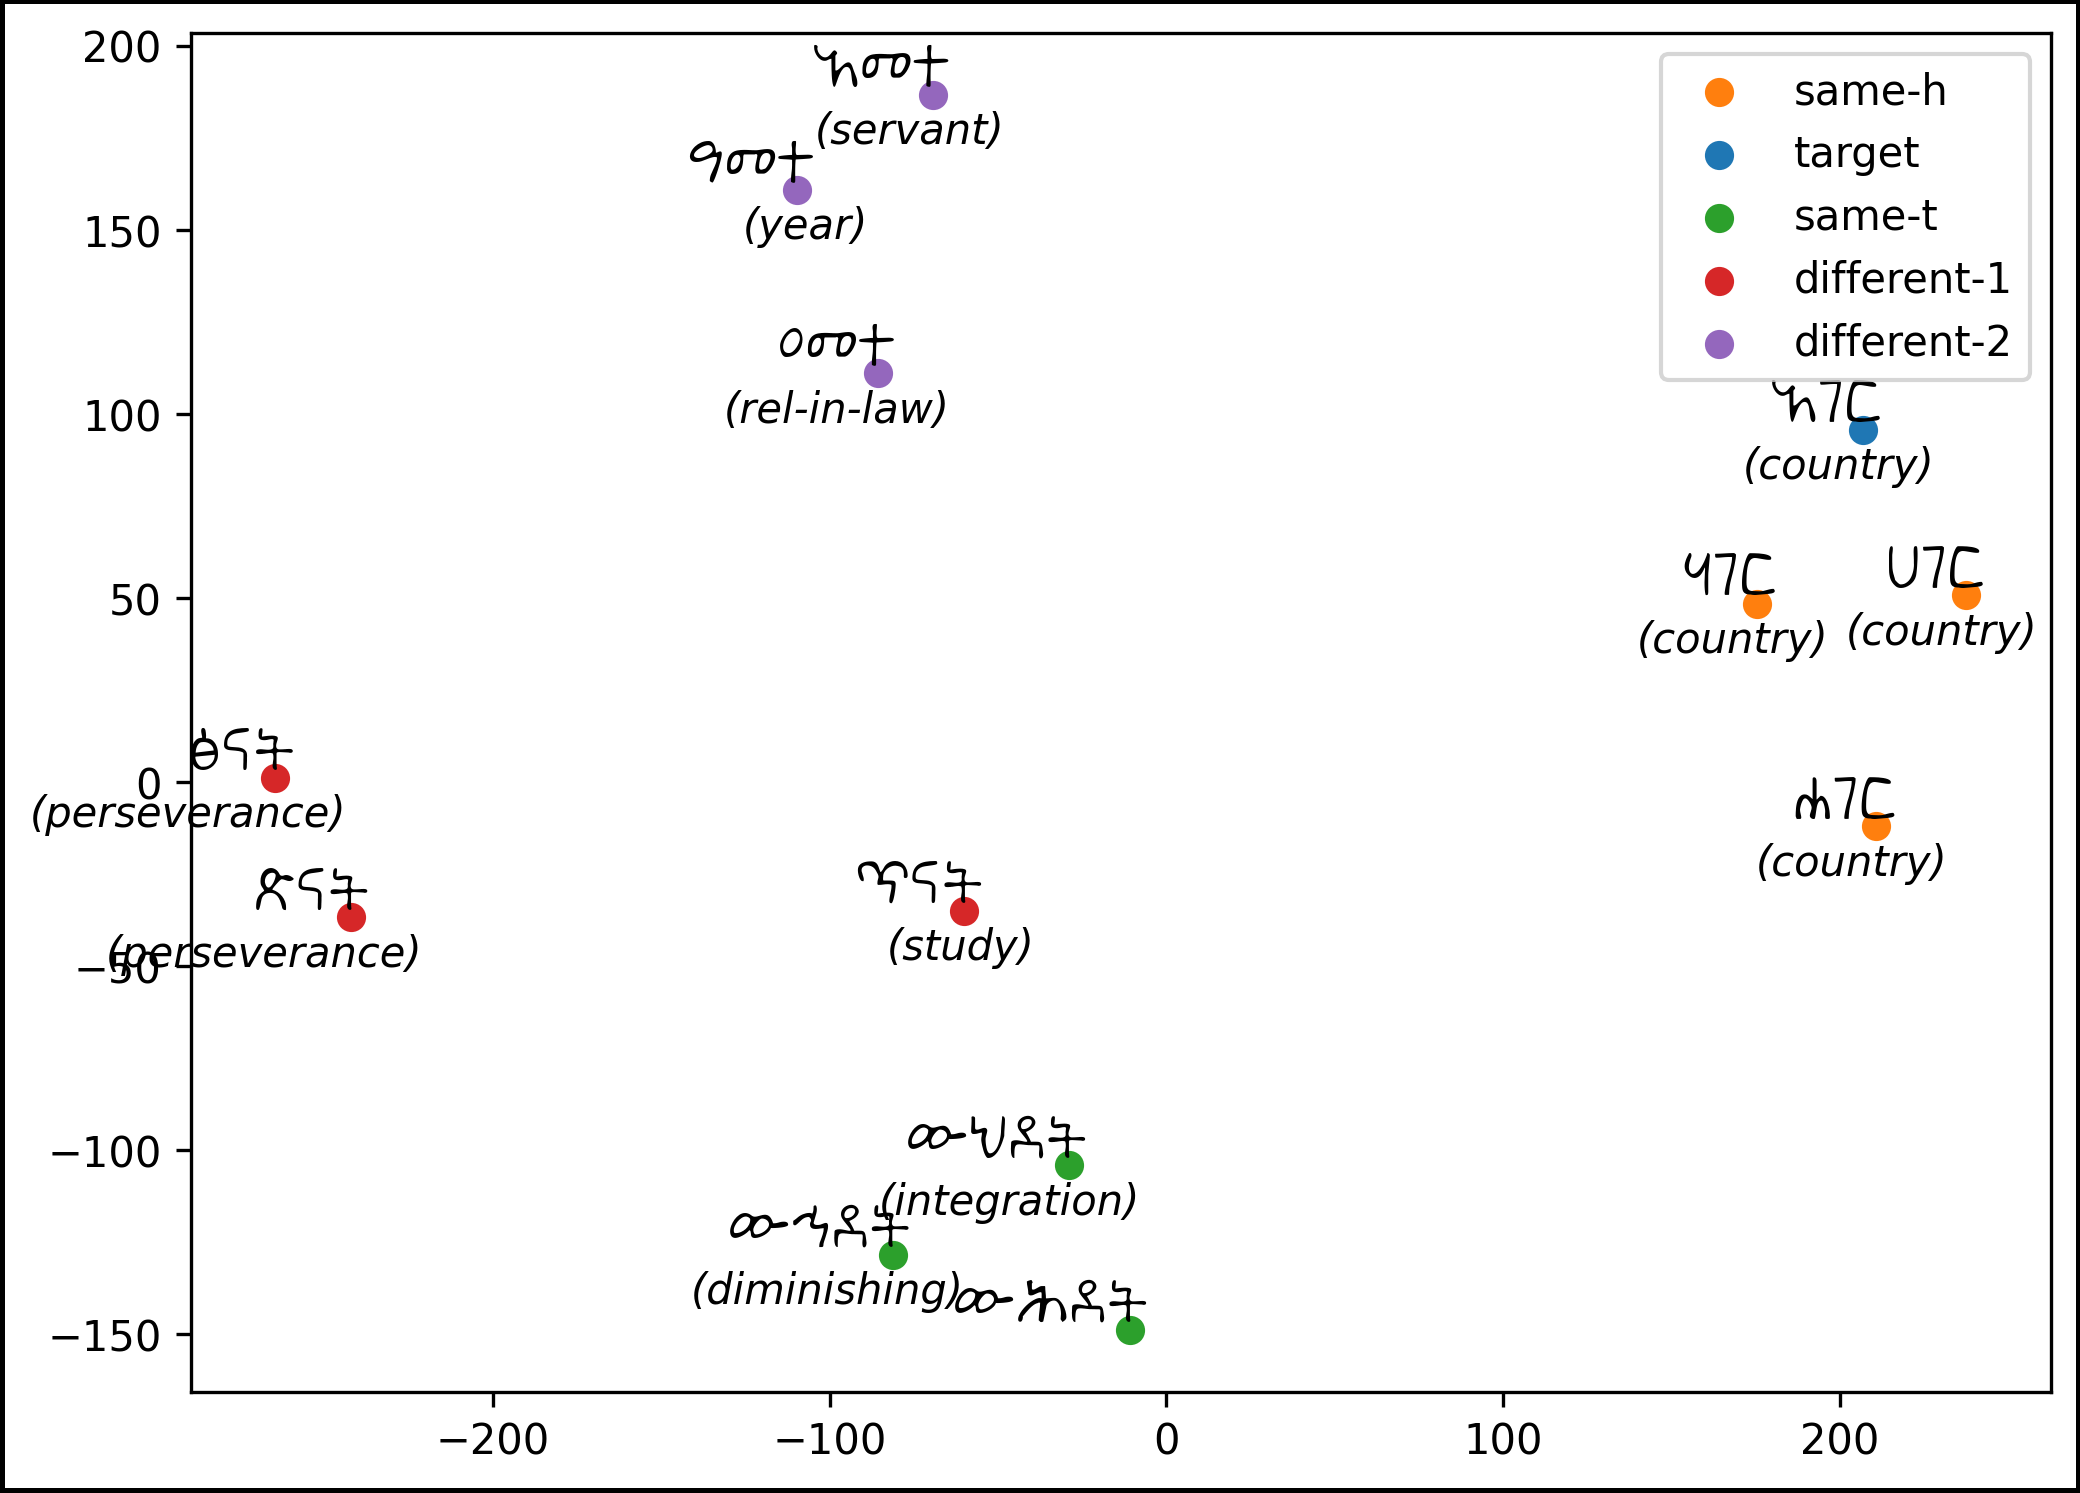

In [11]:
relation2tokens = dict()
relation2tokens['target'] = ['አገር (country)']
relation2tokens['same-h'] = ['ሀገር (country)', 'ሃገር (country)', 'ሐገር (country)']
relation2tokens['same-t'] = ['ውሕደት (integration)', 'ውኅደት (diminishing)', 'ውህደት (integration)']
relation2tokens['different-1'] = ['ፅናት (perseverance)', 'ጽናት (perseverance)', 'ጥናት (study)']
relation2tokens['different-2'] = ['አመተ (servant)', 'ዐመተ (rel-in-law)', 'ዓመተ (year)']
assert(len(relation2tokens['target']) == 1)

main(DT_embedding_path=w2vs, 
   output_plot_save_path='out', 
   relation2tokens=relation2tokens)

In [5]:
import nltk
from IPython.display import HTML, display
import tabulate
tabulate.PRESERVE_WHITESPACE = False

In [6]:
tokens = open("processed/amharic-1.txt").read().split()
len(tokens)

16184314

In [7]:
text = nltk.Text(tokens)

In [8]:
maxl = 0
for t in text.concordance_list('አገር',width=20, lines=16):
    r = ' '.join(t.right)
    l =  ' '.join(t.left)
    maxl = len(r) if maxl<len(r) else maxl
    maxl = len(l) if maxl<len(l)  else maxl

table = [[]]
for t in text.concordance_list('አገር',width=20, lines=16):
    r = ' '.join(t.right)
    l =  ' '.join(t.left)
   # r += (maxl-len(r))
 #   table.append([l,t.query])
 #   table.append([t.query,r])
    table.append([l,t.query,r])
display(HTML(tabulate.tabulate(table, tablefmt='html')))

,,
ኦባማ ፡፡ ደፋሩ አሚን የንግስቲቱ,አገር,ከገባችበት አስከፊ የኢኮኖሚ ድቀት
የሚጠጋ ብድር ያቀርባል አሁን እነዚህ,አገር,ቢረከቡ እንዴት ነው የሚያስተዳድሩን
ታጋዮች ሆናችሁ ልጆቻችሁ ለግርድና ዓረብ,አገር,እንዴት ትልካላችሁ ? ከእኛ
የአማርኛ ሥነ ግጥም መጽሐፍ! የአረብ,አገር,ተጓዦች ፅንስ በማቋረጥ ለጉዳት
የጤና ችግር የጨጓራ በሽታ የታዳጊ,አገር,ህዝቦች ችግር ቆንጆዎች የሥዕል
አመታት በኋላ መካከለኛ ገቢ ያላት,አገር,ትሆናለች የአለም ባንክ ቢዝነስ
ሻምፒዮና ላይ አነጣጥሯል ልጆችን የውጭ,አገር,ዜጋ ማድረግ ሕዝቡን ከድህነት
ማኅበራት ምክር ቤቶችን በአባልነት የሚይዘው,አገር,አቀፉ የኢትዮጵያ ንግድ ዘርፍ
አገርና ሕዝብ በፊት የክርስትና እምነት,አገር,ከማንም አገርና ሕዝብ በፊት
አገርና ሕዝብ በፊት የእስልምና እምነት,አገር,በመሆንዋ ነው ፡፡ እኔ
